In [1]:
import sympy as sp
sp.init_printing()
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np
from scipy.optimize import fsolve
from sympy.utilities.lambdify import lambdify

In [2]:
x = sp.Symbol('x', real = True)
k = sp.Symbol('k', real = True)
h = sp.Symbol('kbar', real = True, positive = True)
a = sp.Symbol('a', real = True, positive = True)
A = sp.Symbol('A')
m = sp.Symbol('m', real = True, positive = True)
t = sp.Symbol('t', real = True, positive = True)

In [4]:
Psi0 = A * sp.exp(-a*x**2)
Psi0

In [5]:
Psi0 * Psi0.conjugate()

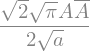

In [8]:
sp.integrate(Psi0 * Psi0.conjugate(), (x, -sp.oo, sp.oo)).simplify()

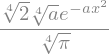

In [11]:
Psi0 = Psi0.subs(A, (2 * a / sp.pi) ** sp.Rational(1, 4))
Psi0